# Using Geopandas to plot

Unfortunately, Cartopy did not seem to work here, and crashes my system (dead kernel). Geopandas seems to operate in a satisfactory way, however.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm
import os

In [2]:
# Get the current working directory
current_path = os.getcwd()

# Print the current working directory
print("Current working directory:", current_path)

#define path to data folder where data will be placed. Print current path if you don't know what it is!
PATH = '/mnt/c/users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/data/'

Current working directory: /mnt/c/Users/s1725621/Documents/PhDCode/Git/dBdtCorrelation/dBdtvsdHdt


In [3]:
###Import list of observatories from csv.
df = pd.read_csv("data/ObsListimo.csv")
print(df['Code'])

listofstationobs=[]

0      ABG
1      ABK
2      AIA
3      API
4      ARS
      ... 
117    VSS
118    WIC
119    WNG
120    YAK
121    YKC
Name: Code, Length: 122, dtype: object


In [5]:
listofstationobs=[]
for i in tqdm.tqdm(df['Code']):
    if os.path.isfile("data/"+i+".csv"):
        dfi=pd.read_csv("data/"+i+".csv")
        dfi=dfi['0']
        dfi=dfi.to_numpy()
        print(dfi)
        listofstationobs.append(dfi)
    else:
        continue

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:00<00:00, 1235.95it/s]

['ABG' '0.08794706429562191' '18.503862645140103' '72.87']
['ABK' '1.4278030878349572' '68.2237443153074' '18.824']
['BDV' '0.2033230139880541' '48.88944614771234' '14.015']
['BEL' '0.2962025349259088' '51.64988467313125' '20.792']
['BLC' '1.701273710385412' '64.1492998350029' '264.0']
['BMT' '0.15896809110802815' '40.1102673265455' '116.2']
['BOU' '0.2705578613332009' '39.9105401962472' '254.8']
['BRW' '3.346555105882482' '71.18281235227613' '203.399']
['BSL' '0.19080948368197387' '30.233298593278576' '270.399']
['CLF' '0.2824607603093794' '47.82557682325504' '2.266']
['CMO' '1.2894413805423437' '64.75184809422272' '212.199']
['CNB' '0.18016138998842207' '-35.13369230500176' '149.363']
['ESK' '0.2776877479615107' '55.11967152957852' '356.8']
['EYR' '0.20255853423097073' '-43.2319036075352' '172.354']
['FCC' '1.5948864094980622' '58.629205863360895' '265.9']
['FRD' '0.19913715839903448' '38.0141173568323' '282.6']
['FRN' '0.19284532687790706' '36.91502291392519' '240.3']
['FUR' '0.1978

In [6]:
listofstationobs=np.array(listofstationobs)
listofstationobs[:,1:]=listofstationobs[:,1:].astype(float)
print(listofstationobs)

[['ABG' 0.08794706429562191 18.503862645140103 72.87]
 ['ABK' 1.4278030878349572 68.2237443153074 18.824]
 ['BDV' 0.2033230139880541 48.88944614771234 14.015]
 ['BEL' 0.2962025349259088 51.64988467313125 20.792]
 ['BLC' 1.701273710385412 64.1492998350029 264.0]
 ['BMT' 0.15896809110802815 40.1102673265455 116.2]
 ['BOU' 0.2705578613332009 39.9105401962472 254.8]
 ['BRW' 3.346555105882482 71.18281235227613 203.399]
 ['BSL' 0.19080948368197387 30.233298593278576 270.399]
 ['CLF' 0.2824607603093794 47.82557682325504 2.266]
 ['CMO' 1.2894413805423437 64.75184809422272 212.199]
 ['CNB' 0.18016138998842207 -35.13369230500176 149.363]
 ['ESK' 0.2776877479615107 55.11967152957852 356.8]
 ['EYR' 0.20255853423097073 -43.2319036075352 172.354]
 ['FCC' 1.5948864094980622 58.629205863360895 265.9]
 ['FRD' 0.19913715839903448 38.0141173568323 282.6]
 ['FRN' 0.19284532687790706 36.91502291392519 240.3]
 ['FUR' 0.19785727904720812 47.9736934397732 11.277]
 ['GDH' 1.5690501849461385 69.12217332730137 3

Text(0, 0.5, 'difference in dBdt calculation')

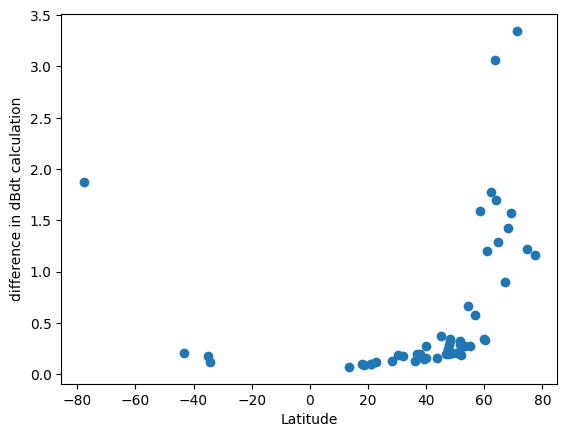

In [7]:
plt.scatter(listofstationobs[:,2],listofstationobs[:,1])
plt.xlabel('Latitude')
plt.ylabel('difference in dBdt calculation')

In [8]:
averagedBarray=[]
Latarray=[]
Longarray=[]
dBdtdiff=[]


df1 = pd.read_csv('data/ObsListimo.csv')
print(df1)

Code=np.array(df1['Code'])
print(Code)
Lat=df1['Latitude']
Long=df1['Longitude']

for i in tqdm.tqdm(Code):
    try:
        string='dBdt_'+str(i)
        pathstring=PATH + 'data_'+str(i)+'.nc'
    
        ds = xr.open_dataset(pathstring)
        dfi=pd.read_csv("data/"+i+".csv")
        dfi=dfi['0']
        dfi=dfi.to_numpy()
        
        dBdtdiff.append(dfi[1])
        Latarray.append(float(dfi[2]))
        Longarray.append(float(dfi[3]))
        
        Y=ds[string]
        Y=np.array(Y)

        #print(ds[string])
        
        #plt.plot(ds['Time'],ds[string])
        #plt.show()
        
        Ytot=[]
        for i in range(len(Y)):
            Ytot.append((Y[i,0]**2+Y[i,1]**2+Y[i,2]**2)**(1/2))
    
        averagedb=np.nanmean(Ytot)
        averagedBarray.append(averagedb)
        
    except:
        continue



    Code                                           Location        Country  \
0    ABG                                             Alibag          India   
1    ABK                                             Abisko         Sweden   
2    AIA  Faraday Islands (Argentine Island) - Akademik ...     Antarctica   
3    API                                               Apia  Western Samoa   
4    ARS                                               Arti         Russia   
..   ...                                                ...            ...   
117  VSS                                          Vassouras         Brazil   
118  WIC                                 Conrad Observatory        Austria   
119  WNG                                             Wingst        Germany   
120  YAK                                            Yakutsk         Russia   
121  YKC                                        Yellowknife         Canada   

     Latitude  Longitude Network Contact  
0     18.6380     72

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 122/122 [00:27<00:00,  4.36it/s]


53 53


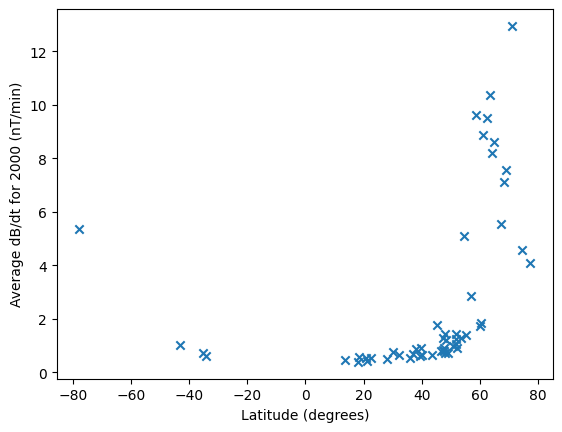

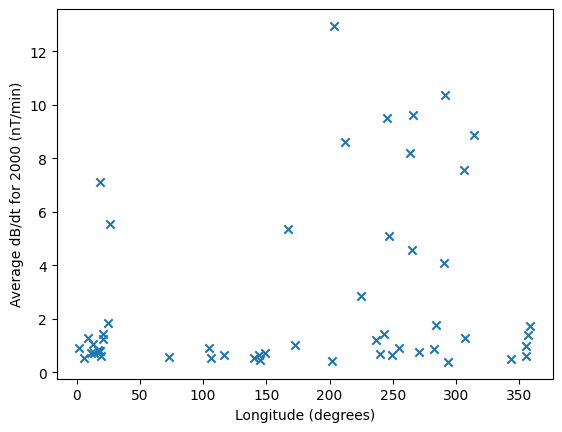

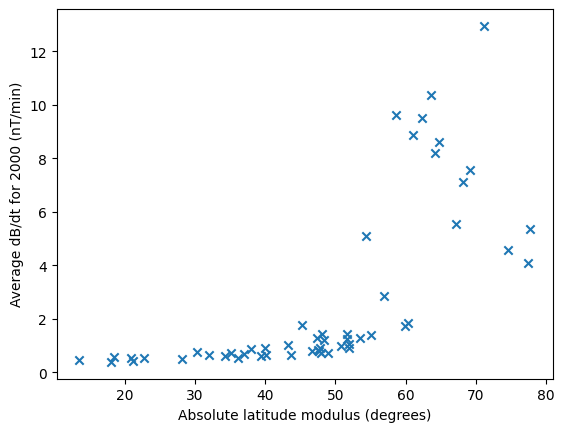

In [9]:
LatMod=[]
LatModforvalid=[]
averagedBarrayforvalid=[]
Correcteddbdiffoverdbaverage=[]

for i in Latarray:
    LatMod.append((float(i)**2)**(1/2))
    
for i in range(len(averagedBarray)):
    if averagedBarray[i]<0.1:
        continue
    else:
        LatModforvalid.append(LatMod[i])
        averagedBarrayforvalid.append(averagedBarray[i])
        Correcteddbdiffoverdbaverage.append(float(dBdtdiff[i])/float(averagedBarray[i]))
        
print(len(Latarray),len(averagedBarray))
        
plt.scatter(Latarray,averagedBarray,marker='x')
plt.xlabel("Latitude (degrees)")
plt.ylabel("Average dB/dt for 2000 (nT/min)")
plt.show()
plt.scatter(Longarray,averagedBarray,marker='x')
plt.xlabel("Longitude (degrees)")
plt.ylabel("Average dB/dt for 2000 (nT/min)")
plt.show()
plt.scatter(LatMod,averagedBarray,marker='x')
plt.xlabel("Absolute latitude modulus (degrees)")
plt.ylabel("Average dB/dt for 2000 (nT/min)")
plt.show()#


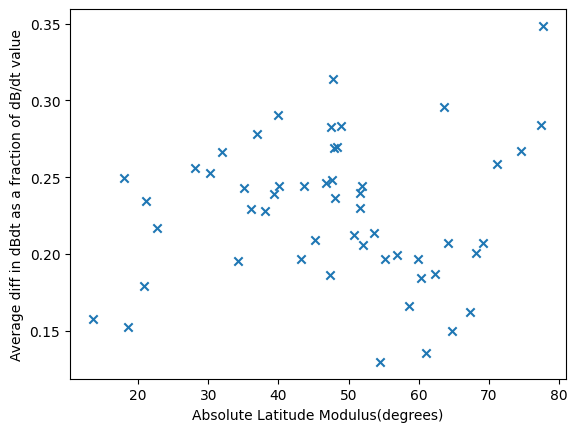

Text(0, 0.5, 'Average diff in dBdt as a fraction of dB/dt value')

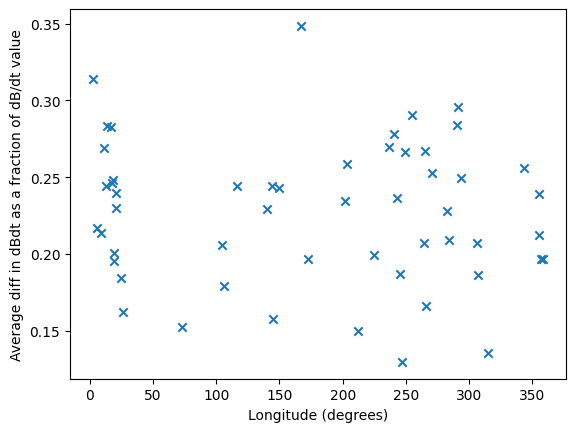

In [10]:
plt.scatter(LatMod,Correcteddbdiffoverdbaverage,marker='x')
plt.xlabel("Absolute Latitude Modulus(degrees)")
plt.ylabel("Average diff in dBdt as a fraction of dB/dt value")
plt.show()
plt.scatter(Longarray,Correcteddbdiffoverdbaverage,marker='x')
plt.xlabel("Longitude (degrees)")
plt.ylabel("Average diff in dBdt as a fraction of dB/dt value")

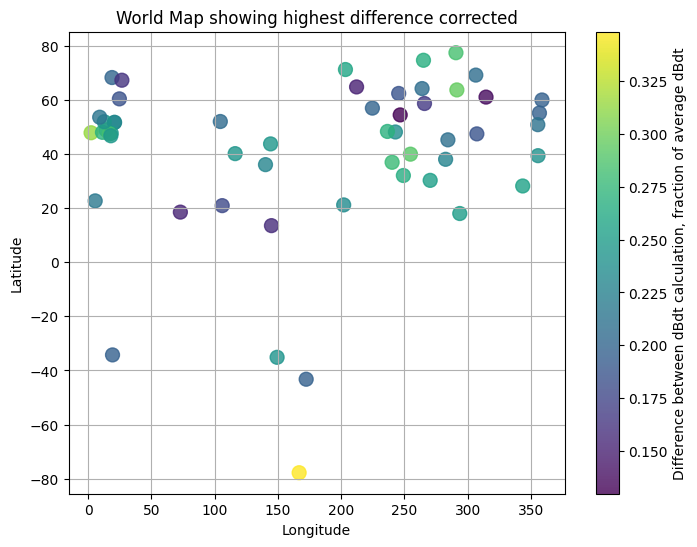

In [25]:
# Plot
plt.figure(figsize=(8, 6))
plt.scatter(Longarray, Latarray, c=Correcteddbdiffoverdbaverage, cmap='viridis', s=100, alpha=0.8)  # 'viridis' colormap can be replaced with any other colormap
plt.colorbar(label='Difference between dBdt calculation, fraction of average dBdt')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('World Map showing highest difference corrected')
plt.grid(True)
plt.show()

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [13]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

In [ ]:
# Create a map of the world
#fig = plt.figure(figsize=(10, 6))
#ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()
#ax.coastlines(resolution='110m')

# Plot the scatter data on top of the map
#sc = ax.scatter(Longarray, Latarray, c=Correcteddbdiffoverdbaverage, cmap='viridis', s=100, alpha=0.8, transform=ccrs.PlateCarree())

# Add colorbar
#cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.7)
#cbar.set_label('Color by Z')

#plt.title('Scatter Plot on World Map')
#plt.show()

In [19]:
path = gplt.datasets.get_path("world")
world = gpd.read_file(path)

/home/spiralwidget/.local/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<Axes: >

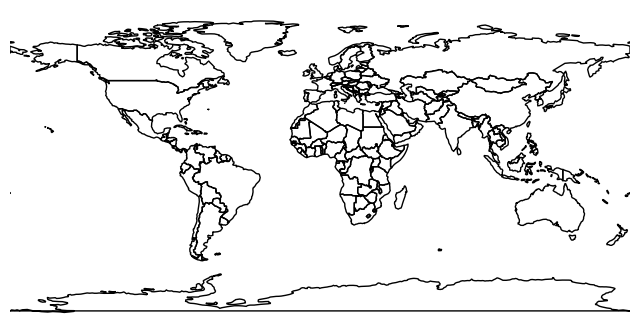

In [20]:
gplt.polyplot(world)

In [39]:
import geopandas as gpd
from shapely.geometry import Point

# Example latitude and longitude arrays
#Longarray = [longitude_1, longitude_2, ...]
#Latarray = [latitude_1, latitude_2, ...]

Longarray = [(lon - 360) if lon > 180 else lon for lon in Longarray]

# Create a list of shapely Point objects from latitude and longitude arrays
geometry = [Point(lon, lat) for lon, lat in zip(Longarray, Latarray)]

# Create a GeoDataFrame
geomagobs = gpd.GeoDataFrame(geometry=geometry, crs='EPSG:4326')

# Now you can use the continental_usa_cities GeoDataFrame with the pointplot function

<Axes: >

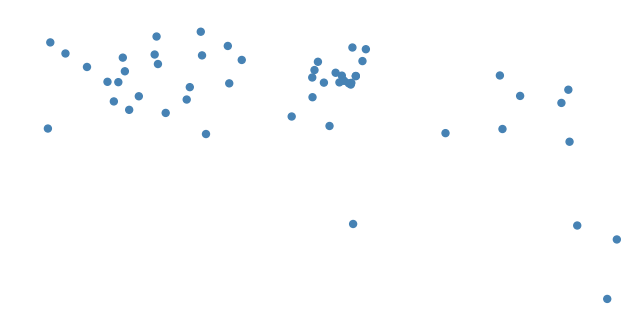

In [40]:
gplt.pointplot(geomagobs)

<Axes: >

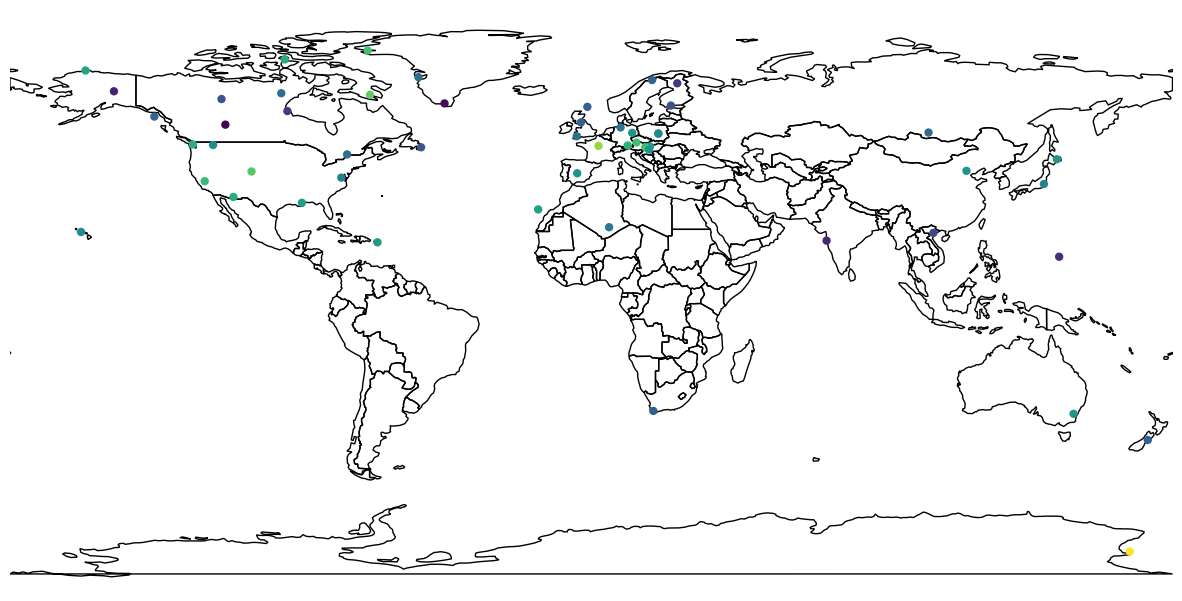

In [50]:
ax = gplt.polyplot(world,figsize=(15, 15))
gplt.pointplot(geomagobs, ax=ax, hue=Correcteddbdiffoverdbaverage,figsize=(15, 15))

In [2]:
ax = gplt.polyplot(world,figsize=(15, 15))
gplt.pointplot(geomagobs, ax=ax, hue=Correcteddbdiffoverdbaverage,figsize=(15, 15),s=50)

NameError: name 'gplt' is not defined